In [ ]:
from google.colab import drive
drive.mount('/gdrive') 

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
# import some common libraries
import csv
import numpy as np
import os, glob, pickle
import matplotlib.pyplot as plt

In [ ]:
# load all the pickle files(for each class) into a list
udacity_root = 'E:/Summer2021Research/Udacity/250epoch'
oi_root = 'E:/Summer2021Research/OpenImages/250_epoch'
bdd_root = 'E:/Summer2021Research/bdd100k/100k'
kitti_root = 'E:/Summer2021Research/Kitti/training/250epoch'
nuimages_root = 'E:/Summer2021Research/NuImages/data/sets/nuimages/250_epoch'

mask_roots = ['E:\Summer2021Research\mask_rcnn\\' + root for root in os.listdir('E:\Summer2021Research\mask_rcnn')]
data_roots = [nuimages_root, bdd_root, kitti_root, udacity_root, oi_root]

root = bdd_root

metrics_root = 'E:/Summer2021Research/Metrics/'
categories = ['Pedestrian', 'Car', 'Truck', 'Cyclist', 'Traffic Light', 'Stop Sign']

file_dir = '/gdrive/My Drive/Summer2021Research/coco2017-250epoch'

metricFiles = sorted(glob.glob(os.path.join(root, '*.pkl')))
metric_ls = []

# open each pickle file that stores metric results of one class
for file_name in metricFiles:
    open_file = open(file_name, "rb")
    metric = pickle.load(open_file) # load metrics as numpy
    metric_ls.append(metric) # append it to a list to use it for later plotting

    # save list as a csv file to easily move it to excel sheet
    open_file.close()
    with open("{}.csv".format(file_name), "w", newline="") as f:
        writer = csv.writer(f)
        writer.writerows(metric)

# old line: n_epochs = int(metricsFiles[0].split('_')[1][-3:]) 
# n_epochs = int(metricFiles[0].split('_')[1][6:]) if len(metricFiles) > 0 else -1 # extract number of epochs in the metric file
n_epochs = 250


classes = [filename[filename.index('cls')+3:filename.index('_', filename.index('cls')+3)].replace('[\'', '').replace('\']','').title() for filename in metricFiles]
datasets = ['']
print(classes)
epochs = np.arange(1, n_epochs+1)
titles = ['instance-level-blind-degree', 'image-level-blind-degree']
x_axes = ['epoch', 'perturbation-norm']

# cat_to_color = {'Car':'b', 'Pedestrian':'y', 'Truck':'purple', 'Traffic Light':'black', 'Cyclist':'g', 'Stop Sign':'r',
#                 'bdd':'y', 'Kitti':'g', 'Nuimages':'black', 'OpenImages':'c', 'Udacity':'b'}

cat_to_color = {'Car':'b', 'Pedestrian':'o-', 'Truck':'g', 'Traffic Light':'purple', 'Cyclist':'black', 'Stop Sign':'r',
                'bdd':'y', 'Kitti':'g', 'Nuimages':'black', 'OpenImages':'c', 'Udacity':'b'}

cat_to_line = {'Car':'solid', 'Pedestrian':'dashed', 'Truck':'dashdot', 'Stop Sign':'dotted', 'Traffic Light':' ', 'Cyclist':' '}
cat_to_width = {'Stop Sign': 3, 'Cyclist':3}

cat_to_marker = {'Car':'>', 'Pedestrian':'d', 'Truck':'s', 'Stop Sign':'H', 'Trafficlight':'X', 'Cyclist':'o'}

['Rider']


In [ ]:
from matplotlib.pyplot import figure

def vis_metrics():

  labels = classes  
  linewidth = 0.5
  markevery = 30
  color='gray'
  linestyle = 'solid'
  # vs. epoch or perturbation norm
  for x_axis in x_axes:

      # for each subplot (img-level, inst_level)
      for j in range(2):
          
          wide_size = (10,3)
          box_size = (6,4)
          fig, axes = plt.subplots(nrows=1, ncols=1, figsize=box_size)

          # for each class
          for idx, metric in enumerate(metric_ls):
            
              print(labels[idx])
              color=cat_to_color[labels[idx]]
              #linewidth=at_to_width[labels[idx]]
              #linestyle=cat_to_line[labels[idx]]

              if x_axis == 'epoch':
                  axes.plot(epochs, 
                               metric[:, 2+j], 
                               label=labels[idx], 
                               c=color,
                               marker=cat_to_marker[labels[idx]],
                               markersize=6,
                               markevery=markevery,
                               linestyle= linestyle,
                               linewidth= linewidth
                               )
              else:
                  axes.plot(metric[:,1], metric[:,2+j], label=labels[idx], c=color, linestyle=linestyle,
                                                           linewidth=linewidth,
                                                            marker=cat_to_marker[labels[idx]],
                                                            markersize=6,
                                                            markevery=markevery)

          # axes[j].set_title(titles[j])
          # axes.set_xlabel(x_axis.replace('-', ' ').title(), fontsize=10)  
          # axes.set_ylabel(titles[j].replace('-', ' ').title(), fontsize=10)
          axes.set_xlabel(x_axis.replace('-', ' ').title(), fontsize=10)  
          axes.set_ylabel(titles[j].replace('-', ' ').title(), fontsize=10)
          axes.legend(fontsize=8)

          fig = plt.gcf()

          plt.savefig('E:/Summer2021Research/Graphs/Box/'+set_name+'_'+titles[j].split('-')[0]+'_'+x_axis.split('-')[-1]+'_2', bbox_inches='tight')
          fig.set_size_inches(wide_size)
          plt.savefig('E:/Summer2021Research/Graphs/Wide/'+set_name+'_'+titles[j].split('-')[0]+'_'+x_axis.split('-')[-1]+'_1', bbox_inches='tight')
          
          plt.show()


E:/Summer2021Research/bdd100k/100k
34
E:/Summer2021Research/bdd100k/100k
bdd100k
Cyclist
['Cyclist']
250 epochs
Cyclist


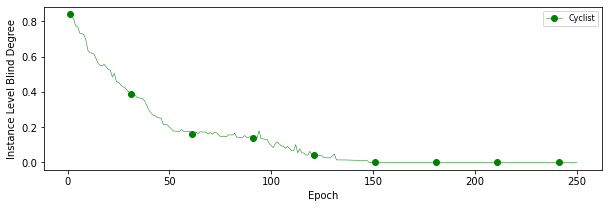

Cyclist


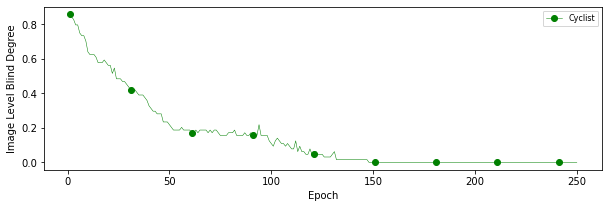

Cyclist


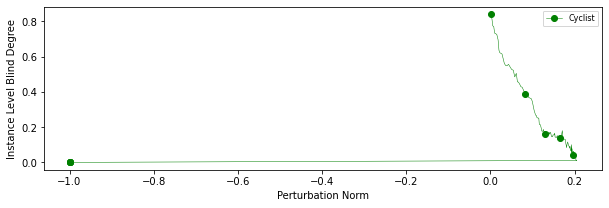

Cyclist


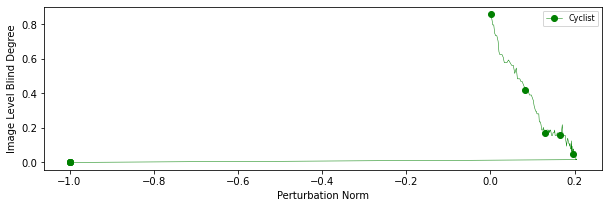

In [ ]:
for root in [root]:
  titles = ['instance-level-blind-degree', 'image-level-blind-degree']
  x_axes = ['epoch', 'perturbation-norm']

  cat_to_color = {'Car':'b', 'Pedestrian':'y', 'Truck':'purple', 'Trafficlight':'black', 'Cyclist':'g', 'Stop Sign':'r',
                  'Bdd':'y', 'Kitti':'g', 'Nuimages':'black', 'Open Images':'c', 'Udacity':'b'}

  print(root)
  print(len(root))
  print(root)
  set_name = 'mask_' + \
  root[root.index('rcnn')+5:] if 'mask' in root else root[root.index('Research/')+9:root.index('/', root.index('Research/')+9)]
  print(set_name)
  classes = []
  
  metricFiles = sorted(glob.glob(os.path.join(root, '*.pkl')))
  metric_ls = []
  for file_name in metricFiles:
    with open(file_name, 'rb') as open_file:
      metric = pickle.load(open_file) # load metrics as numpy
      metric_ls.append(metric) # append it to a list to use it for later plotting

      cls = file_name[file_name.index('cls')+3:file_name.index('_', file_name.index('cls')+3)].replace('[\'', '').replace('\']','').replace('rider','Cyclist').replace('traffic light', 'trafficlight').replace('biker', 'cyclist').title()
      print(cls)
      classes.append(cls)

  print(classes)
  n_epochs = int(metricFiles[0][metricFiles[0].index('epochs')+6 : metricFiles[0].index('_', metricFiles[0].index('epochs')+6)])
  print(str(n_epochs), 'epochs')
  epochs = np.arange(1, n_epochs+1)
  vis_metrics()

**Averaging the Metrics**

NuImages
adding to  Car  from  NuImages
adding to  Cyclist  from  NuImages
adding to  Pedestrian  from  NuImages
adding to  Truck  from  NuImages
['Car', 'Cyclist', 'Pedestrian', 'Truck']
bdd100k
adding to  Car  from  bdd100k
adding to  Pedestrian  from  bdd100k
adding to  Traffic Light  from  bdd100k
adding to  Truck  from  bdd100k
['Car', 'Pedestrian', 'Traffic Light', 'Truck']
Kitti
adding to  Car  from  Kitti
adding to  Pedestrian  from  Kitti
adding to  Truck  from  Kitti
['Car', 'Pedestrian', 'Truck']
Udacity
adding to  Car  from  Udacity
adding to  Pedestrian  from  Udacity
adding to  Traffic Light  from  Udacity
adding to  Truck  from  Udacity
['Car', 'Pedestrian', 'Traffic Light', 'Truck']
OpenImages
adding to  Car  from  OpenImages
adding to  Cyclist  from  OpenImages
adding to  Pedestrian  from  OpenImages
adding to  Stop Sign  from  OpenImages
adding to  Traffic Light  from  OpenImages
adding to  Truck  from  OpenImages
['Car', 'Cyclist', 'Pedestrian', 'Stop Sign', 'Traffic

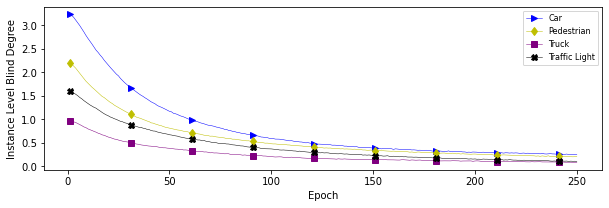

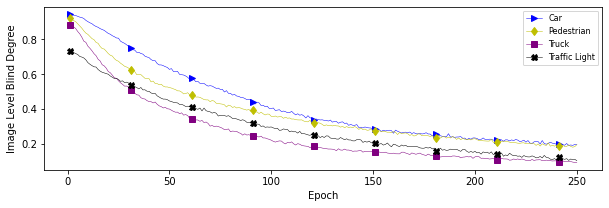

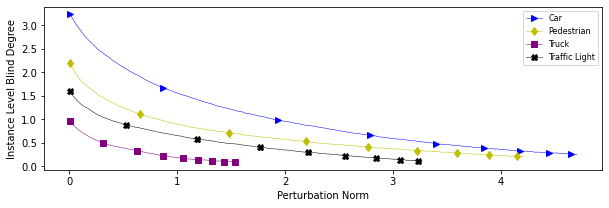

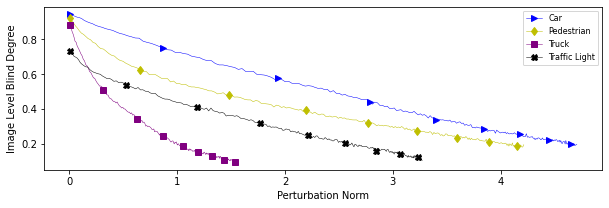

In [ ]:
cat_to_metrics = dict()

for root in data_roots:
  set_name = root.split('/')[2]
  print(set_name)

  classes = []
  metricFiles = sorted(glob.glob(os.path.join(root, '*.pkl')))
  metric_ls = []
  # open each pickle file that stores metric results of one class
  for file_name in metricFiles:
      open_file = open(file_name, "rb")
      metric = pickle.load(open_file) # load metrics as numpy
      metric_ls.append(metric) # append it to a list to use it for later plotting

      cls = file_name[file_name.index('cls')+5:file_name.index('\'', file_name.index('cls')+5)].title()
      classes.append(cls)

      print("adding to ", cls, ' from ', set_name)
      cat_to_metrics[cls] = (cat_to_metrics[cls][0]+metric, cat_to_metrics[cls][1]+1) if cls in cat_to_metrics else (metric, 1)

      open_file.close()

  # print(metricFiles[0])
  # n_epochs = int(metricFiles[0].split('_')[1][6:]) if len(metricFiles) > 0 else -1 # extract number of epochs in the metric file
  print(classes)
  epochs = np.arange(1, n_epochs+1)

metric_ls = []
classes = []
n_epochs = 250
epochs = np.arange(1, n_epochs+1)
print(cat_to_metrics.keys())
for k,v in cat_to_metrics.items():
  metric, count = v

  if count > 2:
    print(k, " with count ", count)
    classes.append(k)
    metric_ls.append(metric/count)

print(classes)
set_name = 'avg'
vis_metrics()